**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os

**Preprocessing Data**

In [2]:
import warnings
warnings.filterwarnings('ignore')
datadir = '/content/drive/MyDrive/ML/Projects/Dataset2'
categories = ['cake','pizza']

target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)

**Creating Dataframe**

In [3]:
df = pd.DataFrame(flat_data)
df['Target'] = target

#Display head of Dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.015002,0.015002,0.007159,0.019936,0.019936,0.011765,0.019637,0.019637,0.011793,0.019608,0.019608,0.011765,0.019608,0.019608,0.012507,0.019608,0.019608,0.016549,0.023529,0.023529,0.020471,0.023529,0.023529,0.020471,0.020471,0.020471,0.020028,0.019608,0.019608,0.019608,0.020648,0.020648,0.017589,0.033464,0.033464,0.025621,0.051281,0.054484,0.042784,0.070775,...,0.599699,0.558941,0.437229,0.667264,0.622192,0.510402,0.677763,0.623901,0.516979,0.632952,0.571828,0.469867,0.580341,0.503399,0.393256,0.598651,0.524141,0.402573,0.638850,0.573412,0.466658,0.698954,0.642980,0.566954,0.699565,0.657291,0.586703,0.686837,0.627118,0.563484,0.597153,0.506356,0.456107,0.601020,0.497333,0.458980,0.635691,0.532005,0.497573,cake
1,0.698724,0.667351,0.749704,0.710745,0.675451,0.757804,0.737386,0.702222,0.784575,0.745098,0.722843,0.800000,0.749762,0.736706,0.811216,0.753804,0.736419,0.812627,0.746327,0.733333,0.802458,0.732549,0.712157,0.779216,0.703869,0.662641,0.731216,0.686850,0.639503,0.694980,0.682353,0.627451,0.677098,0.685307,0.627451,0.670588,0.690196,0.623529,0.666667,0.696392,...,0.891922,0.766431,0.676235,0.886170,0.760680,0.670484,0.881313,0.755823,0.666667,0.874222,0.752366,0.666379,0.864654,0.743085,0.670064,0.884243,0.759922,0.692086,0.872514,0.750945,0.675207,0.860496,0.741386,0.652026,0.857412,0.735843,0.650667,0.850118,0.725490,0.660608,0.857830,0.732340,0.681359,0.865804,0.740314,0.687843,0.854039,0.728549,0.669904,cake
2,0.337882,0.214317,0.199242,0.421136,0.307254,0.239805,0.489699,0.385127,0.243503,0.510856,0.406595,0.216810,0.531869,0.419624,0.220575,0.545752,0.419608,0.239373,0.545098,0.428436,0.230676,0.544531,0.435294,0.241393,0.538275,0.440444,0.261281,0.541176,0.456747,0.294301,0.541176,0.466228,0.319315,0.558319,0.495477,0.353490,0.600340,0.535229,0.388510,0.611529,...,0.463150,0.433333,0.468222,0.507201,0.460142,0.515044,0.510065,0.463007,0.517098,0.497150,0.450092,0.497815,0.523791,0.476732,0.520678,0.558395,0.510403,0.555041,0.525011,0.477952,0.525159,0.452155,0.394638,0.465227,0.469542,0.414641,0.481369,0.463562,0.398948,0.461445,0.528314,0.462039,0.516238,0.545933,0.479541,0.527411,0.564354,0.497687,0.541635,cake
3,0.555373,0.648053,0.524785,0.544468,0.637776,0.545728,0.534252,0.635582,0.561752,0.530698,0.639691,0.551990,0.524059,0.633209,0.546751,0.477822,0.583305,0.524934,0.400114,0.494231,0.450971,0.339122,0.429318,0.383880,0.328601,0.421571,0.376471,0.330615,0.421765,0.381595,0.341307,0.431503,0.392288,0.351932,0.442128,0.403085,0.354519,0.444715,0.408383,0.327712,...,0.149020,0.141987,0.124680,0.152941,0.141176,0.121569,0.152941,0.141176,0.118588,0.149020,0.137255,0.117647,0.149020,0.133908,0.113725,0.145098,0.125490,0.109804,0.145098,0.125490,0.109804,0.140766,0.121158,0.105472,0.137255,0.117647,0.101961,0.137255,0.117172,0.101961,0.133333,0.113725,0.101150,0.126745,0.107137,0.095373,0.120863,0.101256,0.091007,cake
4,0.249364,0.166327,0.098902,0.276314,0.196392,0.094980,0.310928,0.232468,0.106978,0.321569,0.239216,0.121569,0.326232,0.239216,0.137569,0.321804,0.235294,0.141412,0.315913,0.228680,0.131869,0.297647,0.203529,0.109020,0.302065,0.202456,0.103974,0.324915,0.224041,0.127974,0.368314,0.266353,0.150431,0.423425,0.319634,0.192527,0.406327,0.325425,0.234431,0.414667,...,0.633712,0.607124,0.486065,0.631477,0.607948,0.481703,0.634431,0.610902,0.477569,0.638129,0.615686,0.485475,0.625542,0.605935,0.486275,0.622753,0.603922,0.486275,0.614728,0.595120,0.473281,0.607216,0.589307,0.452888,0.602631,0.586944,0.447608,0.599523,0.584314,0.464052,0.583582,0.568787,0.455033,0.550980,0.531907,0.400706,0.459080,0.432440,0.278745,cake


**Label Encoding**

In [4]:
# Encoding cake as 0 and pizza as 1
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Target_Label'] = labelencoder.fit_transform(df['Target'])
x = df.iloc[:,:-2].values
y = df.iloc[:,-1].values
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target,Target_Label
0,0.015002,0.015002,0.007159,0.019936,0.019936,0.011765,0.019637,0.019637,0.011793,0.019608,0.019608,0.011765,0.019608,0.019608,0.012507,0.019608,0.019608,0.016549,0.023529,0.023529,0.020471,0.023529,0.023529,0.020471,0.020471,0.020471,0.020028,0.019608,0.019608,0.019608,0.020648,0.020648,0.017589,0.033464,0.033464,0.025621,0.051281,0.054484,0.042784,0.070775,...,0.558941,0.437229,0.667264,0.622192,0.510402,0.677763,0.623901,0.516979,0.632952,0.571828,0.469867,0.580341,0.503399,0.393256,0.598651,0.524141,0.402573,0.638850,0.573412,0.466658,0.698954,0.642980,0.566954,0.699565,0.657291,0.586703,0.686837,0.627118,0.563484,0.597153,0.506356,0.456107,0.601020,0.497333,0.458980,0.635691,0.532005,0.497573,cake,0
1,0.698724,0.667351,0.749704,0.710745,0.675451,0.757804,0.737386,0.702222,0.784575,0.745098,0.722843,0.800000,0.749762,0.736706,0.811216,0.753804,0.736419,0.812627,0.746327,0.733333,0.802458,0.732549,0.712157,0.779216,0.703869,0.662641,0.731216,0.686850,0.639503,0.694980,0.682353,0.627451,0.677098,0.685307,0.627451,0.670588,0.690196,0.623529,0.666667,0.696392,...,0.766431,0.676235,0.886170,0.760680,0.670484,0.881313,0.755823,0.666667,0.874222,0.752366,0.666379,0.864654,0.743085,0.670064,0.884243,0.759922,0.692086,0.872514,0.750945,0.675207,0.860496,0.741386,0.652026,0.857412,0.735843,0.650667,0.850118,0.725490,0.660608,0.857830,0.732340,0.681359,0.865804,0.740314,0.687843,0.854039,0.728549,0.669904,cake,0
2,0.337882,0.214317,0.199242,0.421136,0.307254,0.239805,0.489699,0.385127,0.243503,0.510856,0.406595,0.216810,0.531869,0.419624,0.220575,0.545752,0.419608,0.239373,0.545098,0.428436,0.230676,0.544531,0.435294,0.241393,0.538275,0.440444,0.261281,0.541176,0.456747,0.294301,0.541176,0.466228,0.319315,0.558319,0.495477,0.353490,0.600340,0.535229,0.388510,0.611529,...,0.433333,0.468222,0.507201,0.460142,0.515044,0.510065,0.463007,0.517098,0.497150,0.450092,0.497815,0.523791,0.476732,0.520678,0.558395,0.510403,0.555041,0.525011,0.477952,0.525159,0.452155,0.394638,0.465227,0.469542,0.414641,0.481369,0.463562,0.398948,0.461445,0.528314,0.462039,0.516238,0.545933,0.479541,0.527411,0.564354,0.497687,0.541635,cake,0
3,0.555373,0.648053,0.524785,0.544468,0.637776,0.545728,0.534252,0.635582,0.561752,0.530698,0.639691,0.551990,0.524059,0.633209,0.546751,0.477822,0.583305,0.524934,0.400114,0.494231,0.450971,0.339122,0.429318,0.383880,0.328601,0.421571,0.376471,0.330615,0.421765,0.381595,0.341307,0.431503,0.392288,0.351932,0.442128,0.403085,0.354519,0.444715,0.408383,0.327712,...,0.141987,0.124680,0.152941,0.141176,0.121569,0.152941,0.141176,0.118588,0.149020,0.137255,0.117647,0.149020,0.133908,0.113725,0.145098,0.125490,0.109804,0.145098,0.125490,0.109804,0.140766,0.121158,0.105472,0.137255,0.117647,0.101961,0.137255,0.117172,0.101961,0.133333,0.113725,0.101150,0.126745,0.107137,0.095373,0.120863,0.101256,0.091007,cake,0
4,0.249364,0.166327,0.098902,0.276314,0.196392,0.094980,0.310928,0.232468,0.106978,0.321569,0.239216,0.121569,0.326232,0.239216,0.137569,0.321804,0.235294,0.141412,0.315913,0.228680,0.131869,0.297647,0.203529,0.109020,0.302065,0.202456,0.103974,0.324915,0.224041,0.127974,0.368314,0.266353,0.150431,0.423425,0.319634,0.192527,0.406327,0.325425,0.234431,0.414667,...,0.607124,0.486065,0.631477,0.607948,0.481703,0.634431,0.610902,0.477569,0.638129,0.615686,0.485475,0.625542,0.605935,0.486275,0.622753,0.603922,0.486275,0.614728,0.595120,0.473281,0.607216,0.589307,0.452888,0.602631,0.586944,0.447608,0.599523,0.584314,0.464052,0.583582,0.568787,0.455033,0.550980,0.531907,0.400706,0.459080,0.432440,0.278745,cake,0


**Splitting the Data**

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,stratify=y)

**Normalization**

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Classification Algorithm with Best Parameters**


*   Using SVM for Classification
*   Hyperparameter Tuning using GridSearchCV



In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear', 'rbf', 'poly'],
    'C':[0.1,1,10,100],
    'gamma' : [1,0.1,0.01,0.001,0.0001]
}

grid = GridSearchCV(model, param, cv = 5)
grid.fit(x_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [8]:
model = SVC(C=10,gamma=0.0001,kernel='rbf')
model.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
y_pred = model.predict(x_test)

**Evaluation of Model**


*   using Confusion Matrix
*   using Classification report



In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred,y_test)

0.78

In [11]:
confusion_matrix(y_pred, y_test)

array([[19,  5],
       [ 6, 20]])

In [12]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.80      0.77      0.78        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



**Testing**

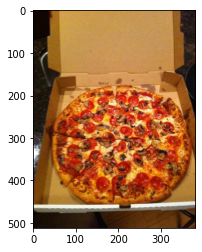

In [19]:
#Testing for another image
test_img = imread('/content/drive/MyDrive/ML/Projects/Test/pizza1.jpg')
plt.imshow(test_img)

In [20]:
# Preprocessing test image
test_img_resize = resize(test_img, (150,150,3))
processed_test_img = np.ndarray.flatten(test_img_resize)

In [21]:
# Predicting for the new image
y_out = model.predict([processed_test_img])
if(y_out[0]==0):
  print('Predicted Output: Cake')
elif(y_out[0]==1):
  print('Predicted Output: Pizza')

Predicted Output: Pizza
